In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('bodyfat.csv')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [54]:
df.head(3)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6


In [55]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [56]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [57]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [58]:
df.corr()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
BodyFat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


In [59]:
x=df.drop(['BodyFat'],axis=1)

In [60]:
def highcorr (data, threshold):
    corr_mat = data.corr()
    corr_fea = set()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>threshold:
                colname = corr_mat.columns[i]
                corr_fea.add(colname)
    print (corr_fea)

In [61]:
print (highcorr(df,0.8))

{'Neck', 'Thigh', 'Biceps', 'Hip', 'Chest', 'Knee', 'Abdomen', 'BodyFat'}
None


In [62]:
x.head(3)

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6


In [63]:
print (highcorr(x,0.9))

{'Hip', 'Abdomen'}
None


In [64]:
print (highcorr(x,0.85))

{'Thigh', 'Hip', 'Chest', 'Knee', 'Abdomen'}
None


In [65]:
print (highcorr(x,0.8))

{'Neck', 'Thigh', 'Biceps', 'Hip', 'Chest', 'Knee', 'Abdomen'}
None


In [66]:
df.BodyFat.corr(df.Abdomen)

0.8134322847810495

In [67]:
df.BodyFat.corr(df.Hip)

0.6252009175086634

In [68]:
print (highcorr(df,.92))

{'Hip', 'BodyFat'}
None


In [69]:
y=list(df.BodyFat)

In [70]:
z=list(df.Thigh)

In [71]:
def detect_outliers(data):
    m=np.mean(data)
    std = np.std(data)
    outliers=list()
    for i in data:
        z=(i-m)/std
        if np.abs(z)>3.5:
            outliers.append(i)
    return (outliers)

            
    

In [72]:
detect_outliers(y)

[]

In [73]:
np.min(df.Density)

0.995

In [74]:
np.mean(y)

19.150793650793652

In [75]:
np.max(df.Density)

1.1089

In [76]:
detect_outliers(z)

[87.3]

In [77]:
np.max(z)

87.3

In [78]:
np.min(z)

47.2

In [79]:
np.std(z)

5.239525102461074

In [80]:
z.sort()

In [81]:
z[-6:]

[71.2, 71.2, 72.5, 72.9, 74.4, 87.3]

In [82]:
a,b=st.pearsonr(df.Thigh,df.BodyFat)

In [83]:
m,c,r,p,e=st.linregress(df.Thigh,df.BodyFat)

In [84]:
a=range(42,95)

In [85]:
b= c+ m*a

Text(0.5, 1.0, 'Bodyfat vs Thigh size')

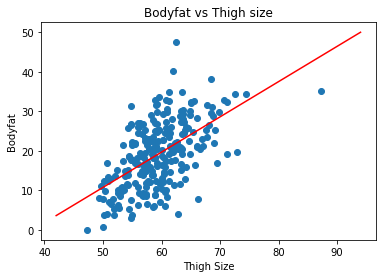

In [86]:
plt.plot(a,b,color='red')
plt.scatter(df.Thigh,df.BodyFat,label='Bodyfat')
plt.xlabel('Thigh Size')
plt.ylabel('Bodyfat')
plt.title('Bodyfat vs Thigh size')

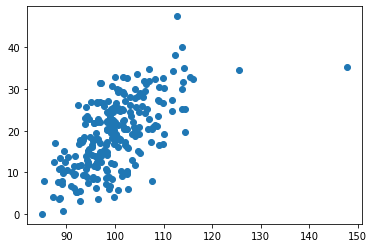

In [87]:
plt.scatter(df.Hip,df.BodyFat,label='Bodyfat')

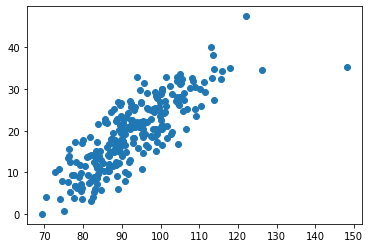

In [88]:
plt.scatter(df.Abdomen,df.BodyFat,label='Bodyfat')

In [89]:
m1,c1,r1,p1,e1=st.linregress(df.Abdomen,df.BodyFat)

In [90]:
def best_feature (x,y):
    m1,c1,r1,p1,e1=st.linregress(x,df.BodyFat)
    m,c,r,p,e=st.linregress(y,df.BodyFat)
      
    if e1>e:
        print ('feature x has lower error') 
    else :
        print ('feature ' y' has lower error') 
    if p1<p and e1>e:
        print ('P-value Supports') 
    elif p1<p and e1<=e:
        print ('P-value Didnt Supports')
    

SyntaxError: invalid syntax (Temp/ipykernel_9064/1755731447.py, line 8)

In [91]:
best_feature (df.Abdomen,df.Thigh)

NameError: name 'best_feature' is not defined

In [92]:
x.columns

Index(['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')

In [93]:
best_feature(x.Density,x.Age)

NameError: name 'best_feature' is not defined

In [94]:
best_feature(x.Density,x.Height)
best_feature(x.Density,x.Neck)
best_feature(x.Density,x.Chest)
best_feature(x.Density,x.Abdomen)
best_feature(x.Density,x.Hip)
best_feature(x.Density,x.Knee)
best_feature(x.Density,x.Ankle)
best_feature(x.Density,x.Forearm)
best_feature(x.Density,x.Biceps)






NameError: name 'best_feature' is not defined

In [1]:
ad,bd=st.pearsonr(df.Density,df.BodyFat)
md,cd,rd,pd,ed=st.linregress(df.Density,df.BodyFat)
adc=round(ad,0)*1000
bdc=round(bd,0)*1000
adc=range(980,1110)
bdc=md*adc+cd*1000
plt.plot(adc,bdc,color='red')
plt.scatter(df.Density,df.BodyFat,label='Bodyfat')
plt.xlabel('Density Size')
plt.ylabel('Bodyfat')
plt.title('Bodyfat vs Density size')

NameError: name 'st' is not defined